In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_11_k_nearest_neighbor/iphone_purchase_records.csv')

In [3]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
df.shape

(400, 4)

In [7]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

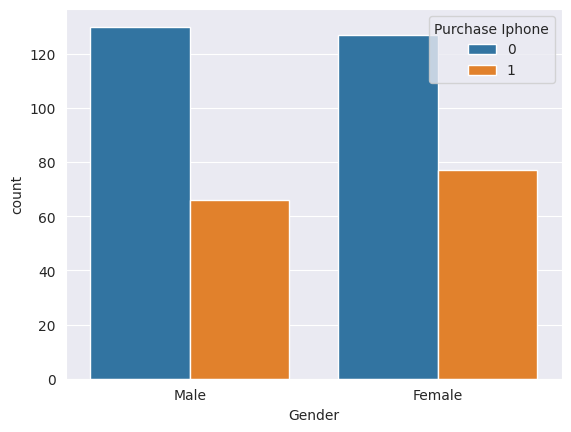

In [9]:
sns.countplot(x='Gender', data=df, hue='Purchase Iphone')

In [10]:
df.loc[df['Purchase Iphone'] == 1, "Gender"].value_counts()

Gender
Female    77
Male      66
Name: count, dtype: int64

In [11]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

Label Encoding

In [14]:
enc = LabelEncoder()

<IPython.core.display.Javascript object>

In [15]:
x.Gender = enc.fit_transform(x.Gender)

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  400 non-null    int64
 1   Age     400 non-null    int64
 2   Salary  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


Splitting the data

In [17]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [18]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Feature Scalling

In [19]:
scaler = StandardScaler()

In [20]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
x_train

array([[ 1.02247472, -1.802001  , -1.46041868],
       [ 1.02247472, -0.2679298 , -1.43121031],
       [-0.97801929, -1.13084485, -0.75941771],
       ...,
       [-0.97801929,  1.17026195, -1.43121031],
       [ 1.02247472, -0.17205035, -1.05150145],
       [-0.97801929,  1.0743825 , -0.96387633]])

Model Selection

In [32]:
log = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)

Model Training

In [33]:
log.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier()

Testing the Model

In [34]:
y_pred = knn.predict(x_test)

In [35]:
result = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})

In [36]:
result.head()

,Actual,Predicted
32,0,0
37,0,0
42,0,1
44,0,0
48,1,1


In [37]:
confusion_matrix(y_test, y_pred)

array([[22,  3],
       [ 2, 13]])

In [38]:
accuracy_score(y_pred, y_test)

0.875